In [ ]:
#| hide
from hybridpredictmaize22.GEMdataset import *

In [ ]:
#| hide
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler
from pathlib import Path

# hybridpredictmaize22

> GxExM yield prediction

Repo for analysis of GEM prediction for maize yield

## Install

```sh
pip install hybridpredictmaize22
```

## How to use

A demo of the library specifically for this dataset

Generate random data that is the same form as the actual dataset

In [ ]:
import random
#generate random SNP matrix
gene_dosages = [0, .5, 1]
years = [2018,2019]
snp_length = 100
number_hybrids = 20


number_environments = 10
env_col = []
for i,y in zip(np.arange(number_environments),[random.choice(years) for _ in range(number_environments)]):
    env_col.append(f'{i}_{y}')

snp_matrix = (np.arange(number_hybrids),np.array([[random.choice(gene_dosages) for x in range(snp_length)] for _ in range(number_hybrids)]))

#generate random yield data
random_yields = [random.uniform(-1,1) for _ in range(100)]
random_hybrids = [random.choice(range(number_hybrids)) for _ in range(100)]
random_environments = [random.choice((env_col)) for _ in range(100)]

In [ ]:
yield_data = pd.DataFrame({"Hybrid":random_hybrids, "Twt_kg_m3":random_yields, 'Env':random_environments})
yield_data.head()

,Hybrid,Twt_kg_m3,Env
0,17,0.543479,0_2018
1,12,0.478831,0_2018
2,18,-0.531289,5_2019
3,5,-0.985384,8_2019
4,17,0.892207,5_2019


In [ ]:
Weather_Table = np.random.random((50,number_environments))
weather_table = {}
for c,i in enumerate(Weather_Table):
    weather_table[c] = i
    
weather_data = pd.DataFrame(weather_table)
weather_data.insert(0,'Env',env_col)
weather_data.insert(1,'Year',[x.split('_')[1] for x in env_col])

weather_data

,Env,Year,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,0_2018,2018,0.135438,0.893152,0.696681,0.186083,0.144052,0.207421,0.820357,0.630119,...,0.229215,0.146218,0.280952,0.551598,0.477262,0.220648,0.619754,0.209158,0.179492,0.551962
1,1_2018,2018,0.629096,0.559186,0.097969,0.944826,0.168804,0.250409,0.245509,0.630153,...,0.557897,0.977796,0.725475,0.704212,0.704146,0.607865,0.249181,0.989791,0.183514,0.940710
2,2_2019,2019,0.921071,0.663877,0.662385,0.470487,0.327737,0.164092,0.457715,0.745058,...,0.970068,0.632019,0.188034,0.664138,0.087425,0.039779,0.265990,0.269049,0.479577,0.788176
3,3_2018,2018,0.190944,0.874809,0.158777,0.670400,0.674480,0.959700,0.101712,0.972589,...,0.884862,0.453163,0.945948,0.606352,0.040516,0.953092,0.779671,0.346626,0.030333,0.538617
4,4_2019,2019,0.105089,0.212292,0.771622,0.254533,0.629636,0.328490,0.335876,0.117927,...,0.438797,0.861428,0.140356,0.323005,0.499025,0.047512,0.751222,0.184190,0.819081,0.692347
5,5_2019,2019,0.061059,0.558536,0.462515,0.341311,0.217486,0.462757,0.590966,0.675250,...,0.021897,0.643383,0.596505,0.116010,0.952698,0.689122,0.535556,0.107630,0.663939,0.070093
6,6_2018,2018,0.294396,0.632301,0.445804,0.491815,0.675145,0.216685,0.184623,0.754238,...,0.320238,0.807772,0.461012,0.756349,0.814438,0.196511,0.158402,0.036382,0.390273,0.279074
7,7_2018,2018,0.292890,0.654487,0.497381,0.469022,0.327980,0.784972,0.763118,0.955591,...,0.354042,0.649566,0.660676,0.209452,0.456160,0.775682,0.755215,0.531778,0.231529,0.608242
8,8_2019,2019,0.641467,0.107874,0.807240,0.498315,0.358921,0.318021,0.108893,0.652953,...,0.073624,0.779337,0.673343,0.803413,0.483666,0.479331,0.670610,0.440654,0.177304,0.824481
9,9_2018,2018,0.344645,0.506140,0.252803,0.569790,0.917261,0.003517,0.893757,0.690826,...,0.395109,0.606832,0.131523,0.469938,0.780373,0.636493,0.292270,0.545538,0.907723,0.183318


In [ ]:
yield_data[]

SyntaxError: invalid syntax (2417634262.py, line 1)

In [ ]:
#Create a GEM dataset
test_split = 2019
gem = GEM(test_split)
gem.Y = YT(yield_data, test_split)
gem.W = WT(weather_data, test_split)
gem.SNP = snp_matrix

In [ ]:
#example of how to unscale a value
gem.Y.scaler.inverse_transform(np.array(1.4).reshape(-1,1))

array([[0.89018647]])

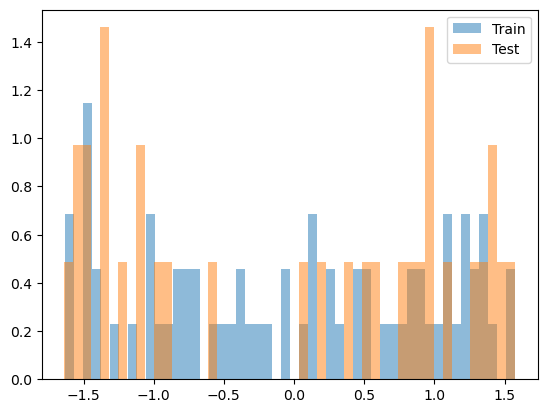

In [ ]:
gem.Y.plot_yields()

In [ ]:
ds = GemDataset(gem.W.Tr, gem.Y.Tr, gem.SNP)
next(iter(ds))

(0.8386916223241356,
 array([0.5, 0. , 0. , 0. , 0. , 1. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. ,
        1. , 0.5, 0. , 0.5, 0.5, 1. , 0.5]),
 array([[-1.14023979,  1.39805979,  1.62517176, -1.61667465, -1.1800152 ,
         -0.57016653,  0.96890185, -1.00047569, -1.29336376,  0.25779814,
          0.65384051,  0.0925728 , -0.93750561,  1.25020881,  0.01215113,
          1.2197219 , -0.57076192, -0.61429767,  0.99758238, -0.29913098,
         -0.02834196,  0.67874733, -1.06348221,  0.89766043,  0.73350378,
          0.94257045,  0.28997314, -1.74401964,  1.26692694,  1.88565341,
         -0.85713326, -0.38294484, -0.79667129, -0.78774161, -0.69258145,
          0.64549369, -1.54396347, -0.15515772,  1.01609127, -1.01785192,
         -1.05722589, -1.7503806 , -0.9211259 ,  0.01089243, -0.2577546 ,
         -1.24884225,  0.57455646, -0.77539616, -0.49821998,  0.14328283]]))